### Inicialmente vamos a importar <b>Librerias</b> que son la base de todas las herramientas que vamos a utilizar luego.

In [1]:
import numpy as np # Calculo numerico de matrices
import scipy as sc # Amplia np a imagenes y demas, pero en este caso no lo vamos a usar
import sklearn as sk # De aqui sacamos datos para practicar y atajos de machine learning
import matplotlib.pyplot as plt # Muy util para graficar.

In [2]:
# Comenzamos buscando los datos del dataset de bostom, datos sobre la ciudad
from sklearn.datasets import load_boston

In [3]:
#Cargamos los datos de la libreria a una variable para facil acceso
Boston = load_boston()

### Si pulsamos la tecla "Tab"del teclado luedo de colocar la palabra clabe <b>"Boston."</b> nos dara todo lo que podemos acceder con esa variable.

In [4]:
#Vamos a imprimir la descripcion de boston, esta nos dira de que tratan los datos
print(Boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Para este caso lo que vamos a hacer es hacer una comparativa de el valor de una vivienda dependiendo de el numero de habitaciones. Para esto trabajaremos con la bariable precio que aun no la cargamos (Boston.target) y la columna 5 de datos de Boston.data (- RM       average number of rooms per dwelling (numero promedio de habitaciones por vivienda)) 

In [5]:
# En la variable X copiaremos los datos de el promedio de habitaciones 
X = Boston.data[:,5]
Larg=X.shape[0]
print(Larg)

506


In [6]:
#Mostramos los datos (opcional)
print(X)

[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.8

In [7]:
#Cargamos el valor medio de vivienda en la variable Y
Y = Boston.target

In [8]:
#Convertimos los datos a matrices. Esto deberia de hacerse todo al mismo tiempo asi: X=np.array(Boston.data[:,5])
#pero ahora usaremos otro metodo
X1 = np.array(X)
Y = np.array(Y)

<function matplotlib.pyplot.show(*args, **kw)>

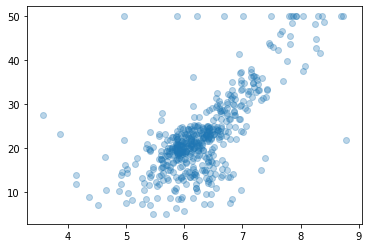

In [9]:
#Intentaremos graficar las matrices de datos.
plt.scatter(X1,Y, alpha = 0.3) # El alpha asigna la satutacion de opacidad en cada punto
plt.show #Muestra la grafica aunque parece que ya no es necesario agregarlo.

### Ahora intentaremos usar la formula de minimos cuadrados ordinarios. 
$\beta = (X^T * X)^-1 * X^T * Y$
### Siendo X y Y matrices, T la transpuesta y * multiplicaciones matriciales                       

In [10]:
# Pero hay dos problemas: 
#Numero 1: Para que funcione la matriz deve de tener una fila de unos (termino independiente)
# Numero 2:como es una columna y debemos trabajar con una fila le hacemos la transpuesta para que funcione.
X = np.array([np.ones(Larg),X1]).T

In [11]:
X.shape #Comprobamos que ahora la matriz es de dos dimenciones.

(506, 2)

In [12]:
#Donde @ es la multiplicacion vectorial y linalg.inv es la inversa de la matriz
B = np.linalg.inv(X.T @ X) @ X.T @ Y
print(B)

[-34.67062078   9.10210898]


<function matplotlib.pyplot.show(*args, **kw)>

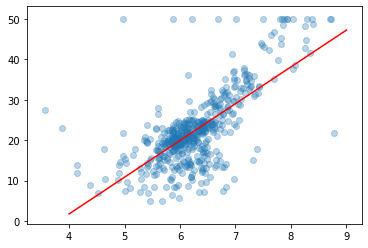

In [14]:
#Ahora poseo una recta que me indica la tendencia de los datos.
#Para graficarla voy a intentar escalar la recta a la grafica anterior que va de 4 a 9
plt.plot([4,9],[B[0]+B[1]*4,B[0]+B[1]*9], C="red")
plt.scatter(X1,Y, alpha = 0.3)
plt.show